<a href="https://colab.research.google.com/github/Suganthan-Thamotharampillai/sales-predictions/blob/main/Project_1_Sales_Predictions_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1** - Sales Predictions - **Final**

- `Suganthan Thamotharampillai`
- `08.29.2022`

In [168]:
## Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [169]:
## Load Dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT9TG2tDHfvrpJJ74gEklLfv_IFSYBu8RoRp1T8oGiHUZLHYgq7OFiL52fC6r37xwpF7yP1hy_B_Zl5/pub?gid=878010276&single=true&output=csv"
df = pd.read_csv(url)

# Machine Learning Dataset
ml_df = df.copy()
ml_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<h2>&nbsp;Data Dictionary

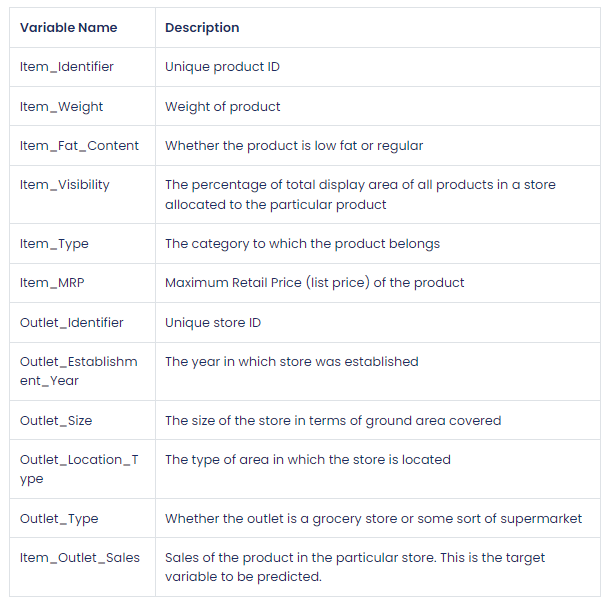

<h3><b>Data Cleaning & Exploring

<ol><li><b>Explore for Duplicates, Missing Values and Inconsistencies

In [170]:
## EXPLORE DATASET
display(ml_df.info())
display(ml_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [171]:
## Checking for Duplicates
print('There are', ml_df.duplicated().sum(), 'duplicates')

There are 0 duplicates


In [172]:
## Checking for Missing Values
print('There are', ml_df.isna().sum().sum(), 'missing values\n')
ml_df.isna().sum()

There are 3873 missing values



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [173]:
## DATA CLEANING
# Identifying Irrelevant Data
# Dropping Columns
display(ml_df.head(0))
ml_df.drop(['Item_Identifier','Outlet_Identifier'], axis=1,inplace=True)
ml_df.head(0)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [174]:
## Checking for Inconsistencies
for col in ml_df.select_dtypes(include='object').columns: print(f"Column:{col}\n{ml_df[col].value_counts(dropna=False)}\n\n")

Column:Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Column:Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Column:Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Column:Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Column:Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Su

- `Column `**`'Item_Fat_Content'`**` is identified to have inconsistant values`

- `Column `**`'Outlet_Size'`**` is identified to have inconsistant categories`

In [175]:
# Identifying Inconsistant Values
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [176]:
# Addressing Inconsistant Values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'] , ['Low Fat', 'Low Fat', 'Regular'])
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [177]:
# Identifying Inconsistant Categories
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [178]:
# Addressing Inconsistant Categories
df['Outlet_Size'] = df['Outlet_Size'].replace(['High'],'Large')
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

<ol start=2><li><b>Identify the features (X) and target (y): Assign "Item_Outlet_Sales" column as target

In [179]:
## VALIDATION SPLIT
## Identifying Features(X) and target(y):'Item_Outlet_Sales'
X = ml_df.drop(columns=['Item_Outlet_Sales'])
y = ml_df['Item_Outlet_Sales']

# Display X, y
display(X.head())
display(pd.DataFrame(y).head())

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1


,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


<ol start=3><li><b>Perform Train Test Split

In [180]:
## TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
display(X_train.head(), X_train.shape)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,2002,NaN,Tier 2,Supermarket Type1


(6392, 9)

<ol start=3><li><b>Create a preprocessing object to prepare the dataset for Machine Learning

In [181]:
## PREPROCESSING OBJECT
## USE PIPELINES AND COLUMN TRANSFORMERS
## INSTANTIATE COLUMN SELECTORS
# Numeric Selector
num_selector = make_column_selector(dtype_include='number')

# Ordinal Selector
ord_selector = ml_df[['Outlet_Size', 'Outlet_Location_Type']].columns

# Nominal Selector
nom_selector = ml_df[['Item_Fat_Content', 'Item_Type', 'Outlet_Type']].columns

In [182]:
## INSTANTITATE TRANSFORMERS
#  Imputers
#a Impute missing values in Numeric Columns with ‘mean’ strategy
mean_imputer = SimpleImputer(strategy='mean')

#b Impute missing values in Ordinal Columns with the ‘most_frequent’ strategy
freq_imputer = SimpleImputer(strategy='most_frequent')

#c Ordinal encode Ordinal Features
#  ordinal = OrdinalEncoder(categories=ordered_labels)

#d One-hot encode Nominal Features
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

#e Scale Numeric Features
scaler = StandardScaler()

In [183]:
### INSTANTITATE PIPELINES
# Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [184]:
# Ordinal Pipeline
# Category
print(df['Outlet_Size'].value_counts(),'\n')
print(df['Outlet_Location_Type'].value_counts())

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [185]:
# Labels
Outlet_Size_label = ['Small', 'Medium', 'High']
Outlet_Location_Type_label = ['Tier 1', 'Tier 2', 'Tier 3']
ordered_labels = [Outlet_Size_label, Outlet_Location_Type_label]

# Encoder
ordinal = OrdinalEncoder(categories=ordered_labels)

# Pipe
ordinal_pipe = make_pipeline(freq_imputer, ordinal, scaler)
ordinal_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [186]:
# Nominal Pipeline
nominal_pipe = make_pipeline(ohe)
nominal_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [187]:
## INSTANTTIATE COLUMN TRANSFORMER
# Tuples for Column Transformer
number_tuple =  (numeric_pipe, num_selector)
ordinal_tuple = (ordinal_pipe, ord_selector)
nominal_tuple = (nominal_pipe, nom_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, ordinal_tuple, nominal_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd95aba38d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Outlet_Size', 'Outlet_Location_Type'], dtype='object')),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object'))])

In [188]:
## DATA TRANSFORMATION
#  Fit on Train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd95aba38d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Outlet_Size', 'Outlet_Location_Type'], dtype='object')),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object'))])

In [189]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [190]:
## Result for Modeling
print('There are', (np.isnan(X_train_processed).sum().sum() + np.isnan(X_test_processed).sum().sum()), 'missing values in Training and Testing data\n')
print('All data in X_train_processed and X_test_processed are', X_train_processed.dtype if X_train_processed.dtype == X_test_processed.dtype else 'not numeric')
print('\nThe Shape of data is', X_train_processed.shape[0], 'rows and', X_train_processed.shape[1], 'columns\n')
display(pd.DataFrame(X_train_processed))

There are 0 missing values in Training and Testing data

All data in X_train_processed and X_test_processed are float64

The Shape of data is 6392 rows and 31 columns



,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.817249,-0.712775,1.828109,1.327849,0.287374,1.084948,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.287374,1.084948,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.287374,-1.384777,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,-1.384048,-0.149914,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,0.287374,-0.149914,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,4.309657,-0.044657,0.017021,0.287374,1.084948,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6388,0.639356,1.008625,-1.058907,1.089517,0.287374,-0.149914,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.920527,1.523027,0.493686,0.287374,-0.149914,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.227755,-0.383777,1.089517,0.287374,-0.149914,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [191]:
# Modeling Data Overview
display(pd.DataFrame(X_train_processed).describe())
display(pd.DataFrame(X_train_processed).info())

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6392.000000,6392.000000,6392.000000,6392.000000,...,6392.000000,6392.000000,6392.000000,6392.00000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,4.457566e-16,-6.169450e-17,4.668773e-17,-4.250806e-15,-8.337094e-19,3.056934e-17,0.040676,0.591834,0.340426,0.013454,...,0.047247,0.020338,0.006571,0.14174,0.051783,0.019086,0.125000,0.651752,0.110138,0.113110
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,0.197554,0.491533,0.473889,0.115219,...,0.212182,0.141164,0.080800,0.34881,0.221607,0.136839,0.330745,0.476452,0.313086,0.316752
min,-1.980409e+00,-1.291052e+00,-1.767529e+00,-1.532139e+00,-1.384048e+00,-1.384777e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.075039e-01,-7.624234e-01,-7.638272e-01,-1.293807e+00,-1.384048e+00,-1.384777e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.213344e-16,-2.318711e-01,3.400912e-02,1.361872e-01,2.873737e-01,-1.499144e-01,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.579511e-01,5.596016e-01,7.172910e-01,7.320181e-01,2.873737e-01,1.084948e+00,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.003199e+00,5.132050e+00,1.994559e+00,1.327849e+00,1.958796e+00,1.084948e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6392 non-null   float64
 1   1       6392 non-null   float64
 2   2       6392 non-null   float64
 3   3       6392 non-null   float64
 4   4       6392 non-null   float64
 5   5       6392 non-null   float64
 6   6       6392 non-null   float64
 7   7       6392 non-null   float64
 8   8       6392 non-null   float64
 9   9       6392 non-null   float64
 10  10      6392 non-null   float64
 11  11      6392 non-null   float64
 12  12      6392 non-null   float64
 13  13      6392 non-null   float64
 14  14      6392 non-null   float64
 15  15      6392 non-null   float64
 16  16      6392 non-null   float64
 17  17      6392 non-null   float64
 18  18      6392 non-null   float64
 19  19      6392 non-null   float64
 20  20      6392 non-null   float64
 21  21      6392 non-null   float64
 22  

None

<ol start=4><li><b>INSTANTIATE THE MODEL</li></ol>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LINEAR REGRESSION

In [192]:
## INSTANTIATE THE MODEL
# Instantiate Model
lin_reg = LinearRegression()

# Fit on Train
lin_reg.fit(X_train_processed,y_train)

LinearRegression()

In [193]:
## MAKE PREDICTIONS
# Create model predictions
predictions_train = lin_reg.predict(X_train_processed)
predictions_test  = lin_reg.predict(X_test_processed)

# Predicted Model
pd.concat([pd.DataFrame(predictions_train, columns=['X_train']), pd.DataFrame(predictions_test, columns=['X_test'])], axis=1).head()

,X_train,X_test
0,3812.382692,1345.309284
1,2662.185948,785.367738
2,2555.445679,825.690396
3,1417.711638,4237.475324
4,1988.771989,3279.747481


**`Compare`**` the performance of your model based on `**`r^2`**

**`Compare`**` the performance of your model based on `**`rmse`**

In [194]:
## EVALUATING MODEL
# R2 RMSE Comparison
# Regression Metrics: R2
train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)
print(f"\nR2\nTraining Data: {round(train_r2*100, 1)}%\nTesting  Data: {round(test_r2*100, 1)}%\n")

# Regression Metrics: RMSE
train_RMSE = np.sqrt(mean_squared_error(y_train, predictions_train))
test_RMSE = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"RMSE\nTraining Data: {round(train_RMSE, 2)}\nTesting  Data: {round(test_RMSE, 2)}")


R2
Training Data: 56.1%
Testing  Data: 56.6%

RMSE
Training Data: 1140.24
Testing  Data: 1094.57


- `R2 Score for Training and Testing data is well balanced`
- `RMSE for Training and Testing data is also well balanced`
- `Linear Regression was able to process Train and Test equally`
- `That could also mean it can be BIAS`
- `Which also is UNDERFITTED, may be because of less data to train`
- `Even though it seems BIAS it may also mean a balanced Bias/Variance Trade off `
- `This result can be studied further and may be changed by introducing more columns(data) for the machine to learn`


<font size=3>&nbsp;&nbsp;REGRESSION TREE

In [195]:
## DECISION TREE
# Instantiate Model
dec_tree = DecisionTreeRegressor(random_state = 42)

# Fit on Train
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [196]:
## MAKE PREDICTIONS
# Create model predictions
predictions_train = dec_tree.predict(X_train_processed)
predictions_test  = dec_tree.predict(X_test_processed)

# Predicted Model
pd.concat([pd.DataFrame(predictions_train, columns=['X_train']), pd.DataFrame(predictions_test, columns=['X_test'])], axis=1).head()

,X_train,X_test
0,515.3292,792.3020
1,3056.0220,1249.0408
2,1577.9460,479.3760
3,1331.6000,5000.8238
4,1687.1372,3372.9428


**`Compare`**` the performance of your model based on `**`r^2`**

**`Compare`**` the performance of your model based on `**`rmse`**

In [197]:
## EVALUATING MODEL
# R2 RMSE Comparison
# Regression Metrics: R2
train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)
print(f"\nR2\nTraining Data: {round(train_r2*100, 1)}%\nTesting  Data: {round(test_r2*100, 1)}%\n")

# Regression Metrics: RMSE
train_RMSE = np.sqrt(mean_squared_error(y_train, predictions_train))
test_RMSE = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"RMSE\nTraining Data: {round(train_RMSE, 2)}\nTesting  Data: {round(test_RMSE, 2)}")


R2
Training Data: 100.0%
Testing  Data: 20.0%

RMSE
Training Data: 0.0
Testing  Data: 1485.55


- `R2 Score for Training data is perfect, and Testing data is disastrous`
- `This Model could  mean, the model is a failure`
- `RMSE for Training and Testing data also indicates a reciprocal relationship`
- `The relationship clearly indicates HIGH VARIANCE and OVERFITTING`
- `Regression Tree was not able to process Train and Test equally`

<font size=3>DETERMINING MODEL IMPLEMENTATION
> <font size=2>RECOMMENDATION<li><font size=2>After Moderate Consideration, <b>I Recommend The Regression Tree Model</b></li>

> <font size=2>JUSTIFICATION<li><font size=2>I recommend The Regression Tree Model for several reasons,</li><li>Because The Linear Regression Model still needs more data to produce a good fitted result<li>Whereas, in Regression Tree Model, the model was already able to learn a 100% percent on training set<li>Which means it's Overfitted and the Variance can be brought down by tuning the model with Hyperparameter Tuning<li>Even though it's a Simple Regression Tree Model, and Hyperparameter Tuning is beyond the scope of this project, with further investigation I believe an Optimal Model can be found for this dataset by Regularizing and Fine Tuning the Hyperparamenter Tuning parameters such as 'n_estimator' and 'max_depth'